C:\Users\DELL\Documents\Custom Office Templates\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Preview:
  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total


Churn Rate by Contract Type:
Customer Status   Churned    Joined    Stayed
Contract                                     
Month-to-Month   0.503234  0.079560  0.417206
One Year         0.132601  0.007601  0.859797
Two Year         0.034649  0.013699  0.951652


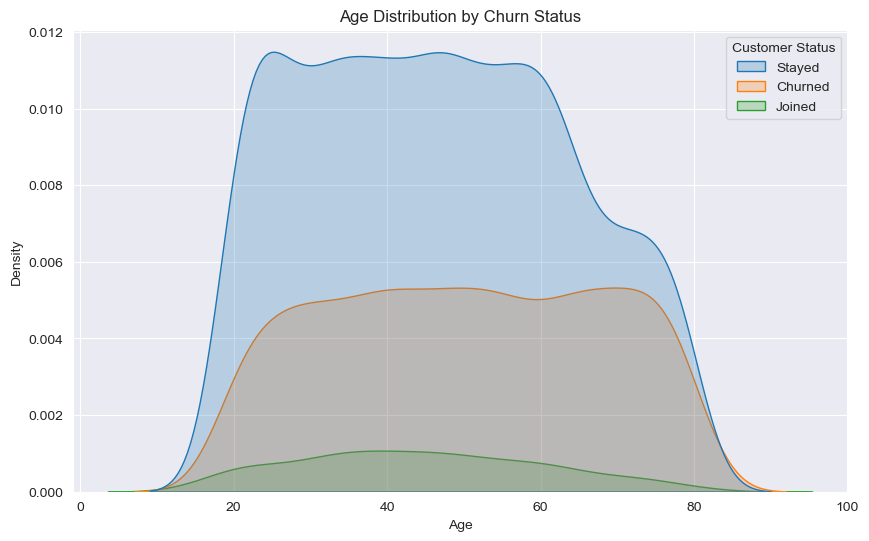

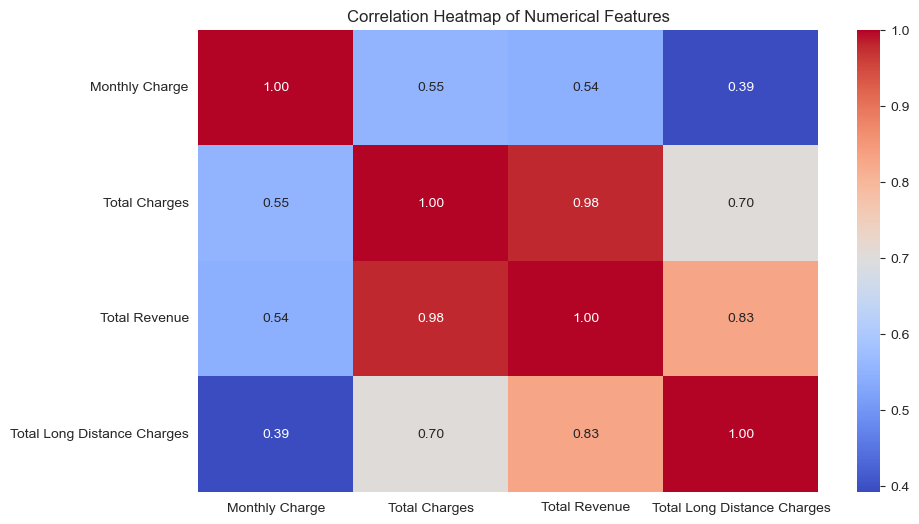

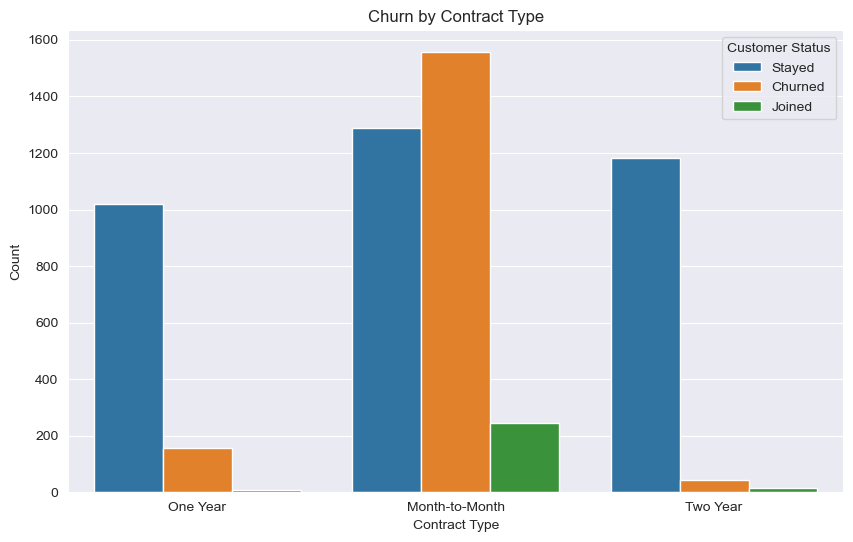

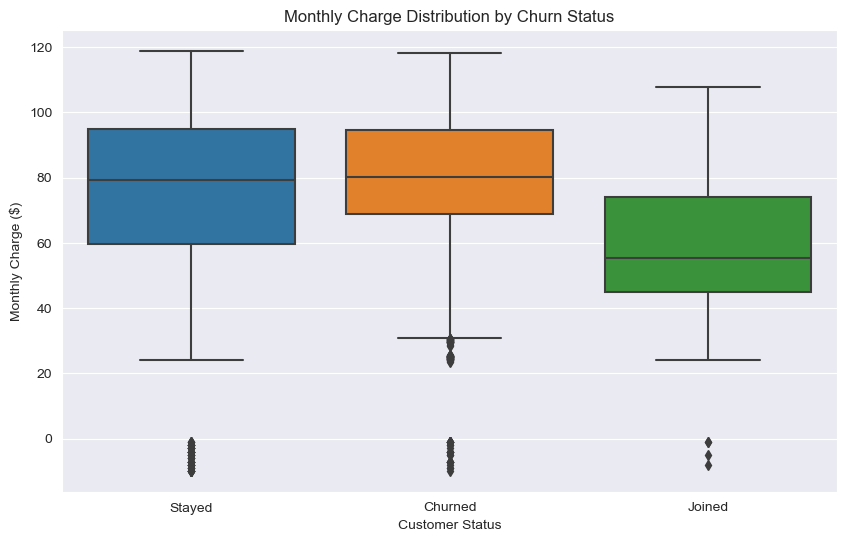

In [1]:
# # Telecom Customer Churn Analysis
# This script analyzes a telecom customer churn dataset to identify factors influencing churn.
# We’ll explore relationships between features like age, charges, tenure, and contract type
# using data analysis and visualizations.

# ## Objectives
# - Understand the dataset’s structure and quality.
# - Identify patterns in churn behavior.
# - Visualize key relationships to communicate findings.

# ## Dataset
# Sourced from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
# Contains customer demographics, services, billing info, and churn status.

# ## Setup
# Import libraries and load the dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent plotting style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size for readability

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('telecom_customer_churn.csv')

# ## Data Exploration
# Inspect the dataset to understand its structure and quality.

# Preview the first few rows
print("Dataset Preview:")
print(df.head())

# Check data types and non-null counts
print("\nDataset Info:")
df.info()

# Summarize missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic numerical summary
print("\nNumerical Summary:")
print(df.describe())

# ## Data Cleaning
# Handle missing values to ensure reliable analysis.
# - 'Churn Category' and 'Churn Reason' are NaN for 'Stayed' customers, so fill with 'Not Applicable'.
# - For simplicity, drop rows with missing 'Internet Type' (or could impute based on context).

df['Churn Category'] = df['Churn Category'].fillna('Not Applicable')
df['Churn Reason'] = df['Churn Reason'].fillna('Not Applicable')
df.dropna(subset=['Internet Type'], inplace=True)  # Drop rows missing critical service info
print("\nAfter Cleaning - Missing Values:")
print(df.isnull().sum())

# ## Analysis
# Compute statistics to uncover churn patterns.

# Average tenure by churn status
tenure_by_status = df.groupby('Customer Status')['Tenure in Months'].mean()
print("\nAverage Tenure by Churn Status:")
print(tenure_by_status)
# Insight: Longer tenure might indicate loyalty among 'Stayed' customers.

# Churn rate by contract type
contract_churn = df.groupby('Contract')['Customer Status'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Type:")
print(contract_churn)
# Insight: Month-to-month contracts may have higher churn rates.

# ## Visualizations
# Create plots to visualize key relationships.

# 1. Age Distribution by Churn Status (KDE Plot)
plt.figure()
sns.kdeplot(data=df, x='Age', hue='Customer Status', fill=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
# Insight: Older customers (e.g., 60+) may show higher churn density.

# 2. Correlation Heatmap of Numerical Features
numerical_cols = ['Monthly Charge', 'Total Charges', 'Total Revenue', 'Total Long Distance Charges']
corr = df[numerical_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# Insight: High correlation between 'Total Charges' and 'Total Revenue' suggests overlap.

# 3. Churn by Contract Type (Bar Plot)
plt.figure()
sns.countplot(data=df, x='Contract', hue='Customer Status')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()
# Insight: Month-to-month customers likely churn more than those on longer contracts.

# 4. Monthly Charge Distribution by Churn Status (Box Plot)
plt.figure()
sns.boxplot(data=df, x='Customer Status', y='Monthly Charge')
plt.title('Monthly Charge Distribution by Churn Status')
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge ($)')
plt.show()
# Insight: Higher monthly charges might correlate with churn.

# ## Conclusions
# Key findings:
# - Older customers (60+) appear more likely to churn based on age distribution.
# - Customers with month-to-month contracts have a higher churn rate than those on 1- or 2-year contracts.
# - Higher monthly charges may contribute to churn, as seen in the box plot.
# - Tenure is longer among 'Stayed' customers, suggesting loyalty grows with time.
#
# Next steps:
# - Investigate churn reasons (e.g., 'Competitor' vs. 'Dissatisfaction') for deeper insights.
# - Build a predictive model to classify churn risk using these features.